# Titanic Project

 We want to predict if a person would survive to the Titanic Tragedy. Therefore, this problem is actually a binary classification problem. 

* Importing Libriries

In [1]:
import numpy as np # linear algebra                                                                                                           
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)                                                                        
import matplotlib.pyplot as plt # this is used for the plot the graph                                                                         
import seaborn as sns # used for plot interactive graph.                                                                                      
from pandas_profiling import ProfileReport
from scipy import stats

%matplotlib inline  

# Data Access

In [2]:
df_train = pd.read_csv("train.csv", sep=",")
df_test =  pd.read_csv("test.csv", sep=",")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Analysis

* Survived (Tarjet Variable): Binary variable for persons who survived (1) and did not survive (0).

* Name: Nominal datatype
* Age: continuous variable.
* Sex: Nominal Variable
* Parch: Ordinary variable representing the number of parents and children aboard.
* SipSp: Ordinary variable representing the number of siblins and spouse aboard.

* PassengerID: Int variable of PassengerID.
* Ticket: Ticket number.
* Cabin: Categorical variable of cabin number.
* Pclass: Ordinary variable with the ticket class: High class (1), Middle class (2), Lower class (3).
* Fare: continuous variable with the ticket price.
* Embarked: Nominal variable with the embarkation port: C = Cherbourg, Q = Queenstown, S = Southampton.

In [4]:
ProfileReport(df_train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


<Figure size 800x550 with 0 Axes>

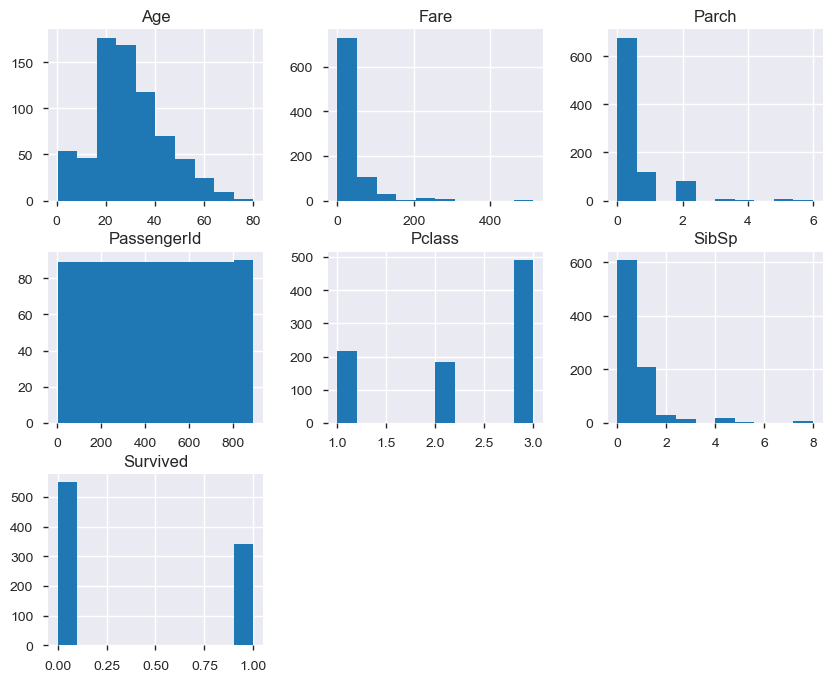

<Figure size 800x550 with 0 Axes>

In [5]:
df_train.hist(figsize=(10,8))
plt.figure()

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kiernan, Mr. Philip",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


* Some Insigths:

* There is no missing values in target variable (Survived)
* Age variable has 19.9% missing values. Mininum age is 0.42 years (5 months) and the maximun is 80 years.
* Features like "Sex" and "Embarked" must be converted to numerical values for further mathematical calculations in machine learning algorithms
* Cabin variable has 77.1% missing values (Probably we are going to drop this attribute in further calculations).

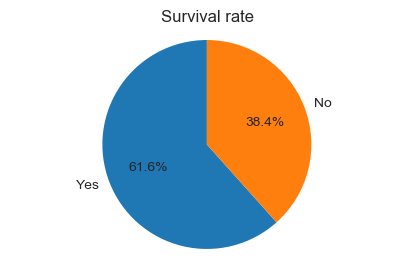

In [8]:
def PiePlot(col, df, labels, title):
    grouped = df[col].value_counts().reset_index() 
    grouped = grouped.rename(columns = {col : "count", "index" : col}) 
    sizes = grouped['count']
    fig1, ax1 = plt.subplots(figsize=(5,3))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
    ax1.axis('equal') 
    plt.title(title)
    plt.show()

PiePlot("Survived", df_train,('Yes', 'No'),"Survival rate")

Let's check survival rate by different attributes like sex, age, SibSp and Parch

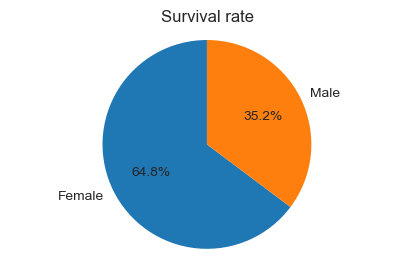

In [9]:
PiePlot("Sex", df_train,('Female', 'Male'),"Survival rate")

Which is an expected result considering that children and females were given 1st preference.

Regarding the Age variable, since it has around 19.9% missing values, we are going to convert it into a categorical variable. This values are going to fill in according the average age of each of the following  categories:
Child (0,12), Teenager (12,18), Adult (18,65) and senior (65-100)

In [10]:
bins = [0,12,18,65,80]
group_ages = 'Child','Teen','Adult','Senior'
df_train["Cat_age"] = pd.cut(df_train["Age"], bins, labels=group_ages, include_lowest = True)

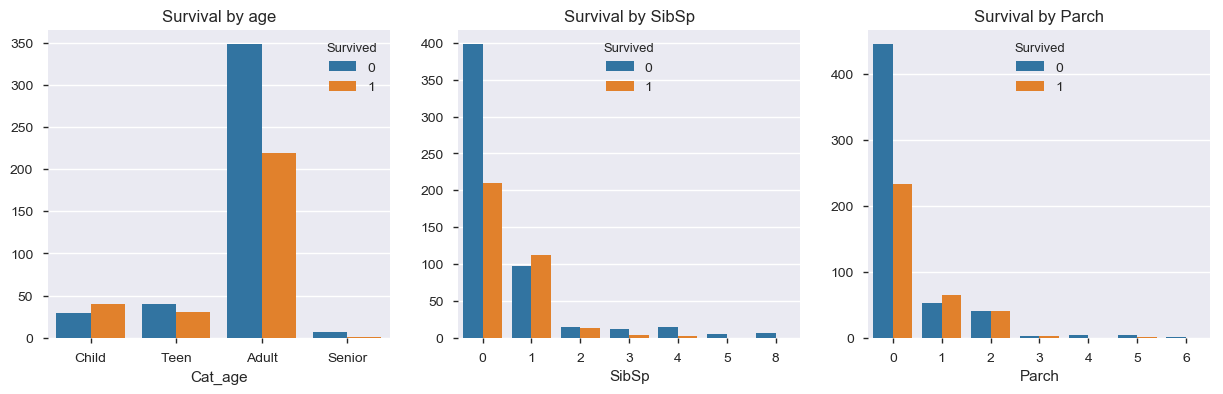

In [11]:
def SurvivalPlotter(df, variables, titles):
        n = len(variables)
        fig, ax = plt.subplots(1,n,figsize=(15,4))
        for i in range(0,n):
            sns.countplot(x=variables[i], hue='Survived', data=df, ax=ax[i])
            ax[i].set_title(titles[i])
            ax[i].set_ylabel('')
        plt.show()
        
variables = "Cat_age","SibSp","Parch"
titles = 'Survival by age', 'Survival by SibSp','Survival by Parch'
SurvivalPlotter(df_train,variables, titles)

Some insights:

* Children had a better chance to live, as expected.
* ~38 % of adults survived, which is considerable amount of their population.
* ~41 % of persons without spouse or siblings survived.
* People with at least one spousse or one sibling had a better chance to live. Probably their husbands prefer save their wifes over themselves.
* People with huge family had lower chances to live.
* People with at least one parent or one child had better chances to live, most likely due to parents who prefer save their child over themselves.
* ~40% of persons without parents and children survived.

Let's check the survival rate for these variables according the variable Sex

In [12]:
variables = "Cat_age","SibSp","Parch"
df_pivot_list = []
for i in variables:
    df_group  = df_train[[i,"Sex","Survived"]].groupby([i,"Sex"],as_index=False).mean()
    df_pivot_list.append(df_group.pivot(index = i,columns = "Sex"))

In [13]:
df_pivot_list[0]

Survived          
Sex        female      male
Cat_age                    
Child    0.593750  0.567568
Teen     0.750000  0.088235
Adult    0.782383  0.181818
Senior        NaN  0.125000

In [14]:
df_pivot_list[1]

Survived          
Sex      female      male
SibSp                    
0      0.787356  0.168203
1      0.754717  0.310680
2      0.769231  0.200000
3      0.363636  0.000000
4      0.333333  0.083333
5      0.000000  0.000000
8      0.000000  0.000000

In [15]:
df_pivot_list[2]

Survived          
Sex      female      male
Parch                    
0      0.788660  0.165289
1      0.766667  0.327586
2      0.612245  0.322581
3      0.750000  0.000000
4      0.000000  0.000000
5      0.250000  0.000000
6      0.000000       NaN

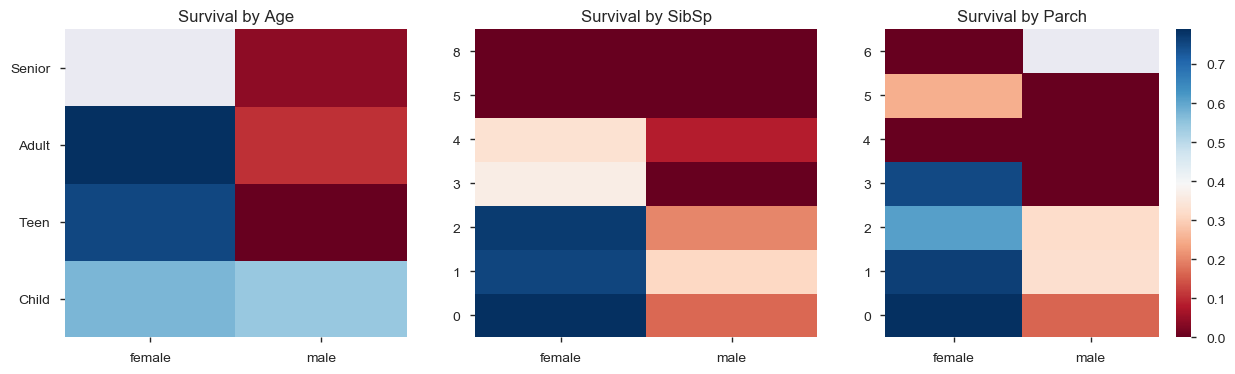

In [16]:
def pivotPlots(pivot_list,titles):
    n = len(pivot_list)
    col_labels = []
    fig, ax = plt.subplots(1,n,figsize=(15,4))
    
    row_labels = pivot_list[0].columns.levels[1]
    for i in range(0,len(ax)):
        ax[i].set_xticks(np.arange(pivot_list[i].shape[1]) + 0.5, minor=False)
        ax[i].set_yticks(np.arange(pivot_list[i].shape[0]) + 0.5, minor=False)
        ax[i].set_xticklabels(row_labels, minor=False)
        im = ax[i].pcolor(pivot_list[i], cmap='RdBu') 
        
        col_labels = pivot_list[i].index
        ax[i].set_title(titles[i])
        ax[i].set_yticklabels(col_labels, minor=False)
    fig.colorbar(im)
    plt.show()

titles = 'Survival by Age', 'Survival by SibSp','Survival by Parch'
pivotPlots(df_pivot_list,titles)

Some insights:
* Female has more chances to live:
    - 78% of adult women survived. There are still good chances for female teens (75%) and children (59%).
    - 78% of single women without siblings survived. Females with SibSp equal to 2 had better chances to live (76%) than those with SibSp equal to 1 (75%)
    - 78% of women without parents nor children survived, and 77% of women with one parent or one child survived. Moreover, women with a big family did not have a good chance to survived (where number of parents plus children is 4, 5 or 6)
* For males, they had good chances only if they were children (57%)

Let's check survival rate by different attributes like PClass, Embarkation and Fare 

We are going to looking for the best way of convert the fare variable into a categorical variable. For this purpose, let's check the relationship of the ticket fare with other variables such as Pclass and Embarkation

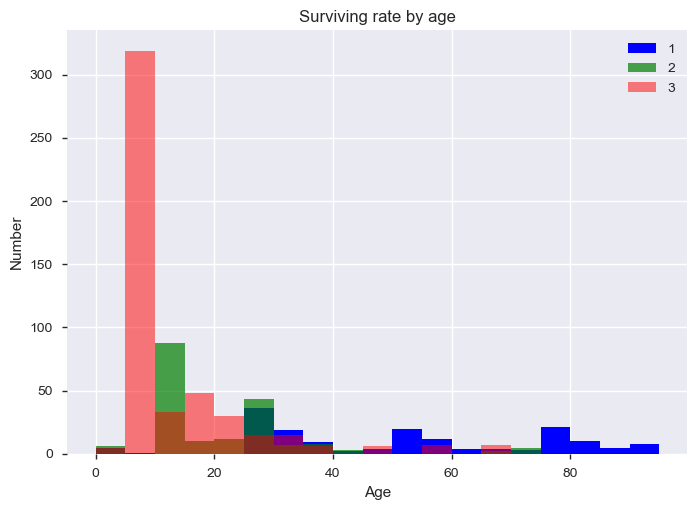

In [17]:
Pc1 = df_train[df_train['Pclass'] == 1]
Pc2 = df_train[df_train['Pclass'] == 2]
Pc3 = df_train[df_train['Pclass'] == 3]

col='Fare'
v1=Pc1[col]
v2=Pc2[col]
v3=Pc3[col]

fig, ax = plt.subplots()
binwidth = 5
bins = [z*binwidth for z in range(0,int(100/binwidth))]
rects1 = ax.hist(v1, bins=bins, histtype='stepfilled', alpha=1, stacked=False, label='1', color = 'Blue', density = False)
rects2 = ax.hist(v2, bins=bins, histtype='stepfilled', alpha=0.7, stacked=False, label='2', color = 'Green', density = False)
rects3 = ax.hist(v3, bins=bins, histtype='stepfilled', alpha=0.5, stacked=False, label='3', color = 'Red', density = False)

ax.set_ylabel('Number')
ax.set_xlabel('Age')
ax.set_title('Surviving rate by age')
ax.legend()

plt.show()

It seems there is no a clear fare difference among classes. For around 60% of lower class, the fare in under \\$10, while the remaining extends even up to $70. For high class, fare is always over \\$25. Let's keep this information in case we will need it.

In [18]:
# converting "Fare" variable into a categorigal one (Cat_age): 
dftest = df_train[["Fare","Pclass","Embarked"]]
df_group_age = dftest.groupby(["Pclass","Embarked"],as_index=False).mean()
table = df_group_age.pivot_table(index=["Pclass"],columns=["Embarked"])
table

Fare                      
Embarked           C          Q          S
Pclass                                    
1         104.718529  90.000000  70.364862
2          25.358335  12.350000  20.327439
3          11.214083  11.183393  14.644083

In [19]:
#This Cat_fare variable could be similiar as Pclass. Therefore, 
# they will be highly correlated and we might drop it
bins = [0,20,40, 150, 550]
group_fare = 'LowPrice','MiddlePrice','HighPrice','Suite'
df_train["Cat_fare"] = pd.cut(df_train["Fare"], bins, labels=group_fare, include_lowest = True)

Let's check survival rate depending on pclass, embarkation port and ticket fare.

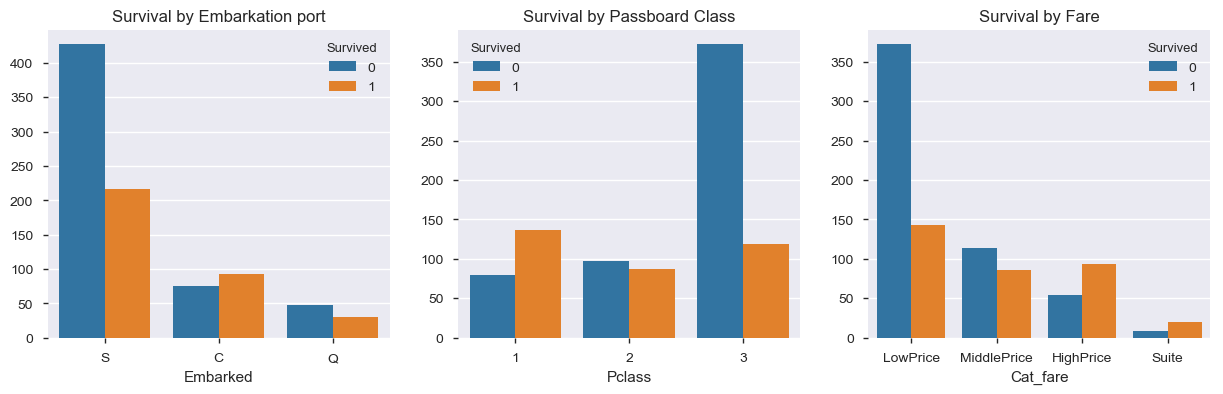

In [20]:
variables = "Embarked","Pclass","Cat_fare"
titles = 'Survival by Embarkation port', 'Survival by Passboard Class','Survival by Fare'
SurvivalPlotter(df_train,variables, titles)

Survival rate depends clearly on these three variables. As you can see, people who embarked at C had more chances to live as well as people with first class tickets. Additionally, people who paid tickets for a HighPrice or Suite had more chances to live. 

Let's check survival rate for males and females by pclass and embarkation port. 

In [21]:
variables = "Pclass","Embarked","Cat_fare"
df_pivot_list_2 = []
for i in variables:
    df_group  = df_train[[i,"Sex","Survived"]].groupby([i,"Sex"],as_index=False).mean()
    df_pivot_list_2.append(df_group.pivot(index = i,columns = "Sex"))

In [22]:
df_pivot_list_2[0]

Survived          
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

In [23]:
df_pivot_list_2[1]

Survived          
Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603

In [24]:
df_pivot_list_2[2]

Survived          
Sex            female      male
Cat_fare                       
LowPrice     0.669014  0.128686
MiddlePrice  0.658228  0.280992
HighPrice    0.932432  0.328767
Suite        0.894737  0.300000

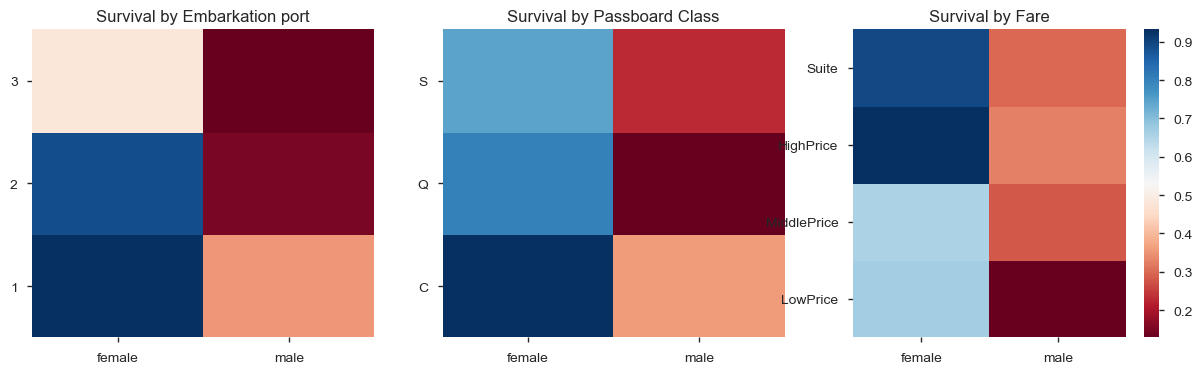

In [25]:
titles = 'Survival by Embarkation port', 'Survival by Passboard Class','Survival by Fare'
pivotPlots(df_pivot_list_2,titles)

Some insights 

* Females of upper class (97%) and middle class (92%) had great chances to live. 
* Females who boarded at Cherbourg port had great chances to live (88%). 
* Females who paid more fare for the ticket have more chances to live (High Price 94% and Suite 89%).
* Males of upper class had better chances to live.

Lets check survival rate considering sex, age and pclass

In [26]:
df_sr = df_train[["Pclass","Sex","Cat_age","Survived"]]
df_group_sr = df_sr.groupby(["Sex","Cat_age","Pclass"],as_index = False).mean()
df_pivot_sr = df_group_sr.pivot_table(df_sr,index=["Sex","Cat_age"],columns=["Pclass"])
df_pivot_sr

Survived                    
Pclass                 1         2         3
Sex    Cat_age                              
female Child    0.000000  1.000000  0.478261
       Teen     1.000000  1.000000  0.550000
       Adult    0.972973  0.900000  0.423729
male   Child    1.000000  1.000000  0.360000
       Teen     0.500000  0.000000  0.076923
       Adult    0.380435  0.073171  0.135000
       Senior   0.250000  0.000000  0.000000

Highest survival rates are for females of upper and middle classes. Its strange that survival rate for female child is zero for uppare class. Actually, there were only one of them and she did not survive:

In [27]:
df_group = df_sr.groupby(["Pclass","Sex","Cat_age"])
df_group.get_group((1,"female","Child"))

,Pclass,Sex,Cat_age,Survived
297,1,female,Child,0


In [28]:
df_sr_1 = df_train[["Sex","Cat_age","Embarked","Survived"]]
df_group_sr_1 = df_sr_1.groupby(["Sex","Cat_age","Embarked"],as_index = False).mean()
df_pivot_sr_1 = df_group_sr_1.pivot_table(df_sr_1,index=["Sex","Cat_age"],columns=["Embarked"])
df_pivot_sr_1

Survived                    
Embarked               C         Q         S
Sex    Cat_age                              
female Child    0.857143       NaN  0.520000
       Teen     0.769231  0.750000  0.736842
       Adult    0.951220  0.500000  0.746479
male   Child    0.750000  0.000000  0.620690
       Teen     0.250000       NaN  0.066667
       Adult    0.338983  0.090909  0.154605
       Senior   0.000000  0.000000  0.200000

In [29]:
df_sr_total = df_train[["Sex","Cat_age","Pclass","Embarked","Survived"]]
df_group_sr_total = df_sr_total.groupby(["Sex","Cat_age","Pclass","Embarked"],as_index=False).mean()
df_pivot_sr = df_group_sr_total.pivot_table(df_sr,index=["Sex","Pclass"],columns=["Cat_age","Embarked"])
df_pivot_sr

Survived                                                     \
Cat_age           Child                     Teen                     Adult   
Embarked              C    Q         S         C     Q         S         C   
Sex    Pclass                                                                
female 1            NaN  NaN  0.000000  1.000000   NaN  1.000000  0.970588   
       2       1.000000  NaN  1.000000  1.000000   NaN  1.000000  1.000000   
       3       0.833333  NaN  0.352941  0.571429  0.75  0.444444  0.666667   
male   1            NaN  NaN  1.000000  0.500000   NaN       NaN  0.468750   
       2       1.000000  NaN  1.000000       NaN   NaN  0.000000  0.000000   
       3       0.666667  0.0  0.388889  0.000000   NaN  0.083333  0.250000   

                                                    
Cat_age                           Senior            
Embarked              Q         S      C    Q    S  
Sex    Pclass                                       
female 1       1.000000  0.972973    NaN  NaN  NaN  
       2       1.000000  0.890909    NaN  NaN  NaN  
       3       0.333333  0.420000    NaN  NaN  NaN  
male   1       0.000000  0.338983    0.0  NaN  0.5  
       2       0.000000  0.081081    NaN  NaN  0.0  
       3       0.111111  0.122807    NaN  0.0  0.0

* Some insights:
* Females:
    - Upper class had 97%, with exception of they who embarked at S (there was only one).
    - middle class had almost 100% survival rate excepting they who embarked at S port.
    - lower class if they were children and embarked at C or Teens embarked at Q more chances to live if they embarked at C.
* Males:
    - All children of upper and middle class survived

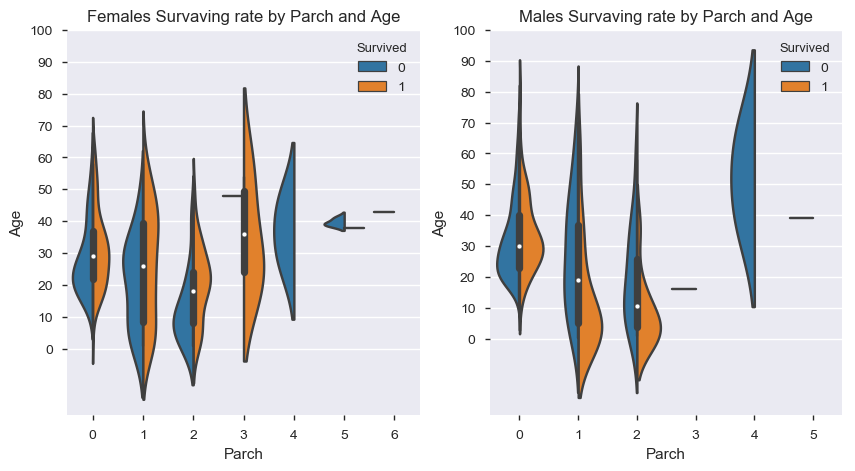

In [30]:
def ViolinPlot(df,col):
    n = 2
    f,ax=plt.subplots(1,n,figsize=(10,5))
    df_sr_sex = df[["Sex",col,"Survived","Age"]]
    df_group_sex = df_sr_sex.groupby(["Sex"])
    df_sex_list = [df_group_sex.get_group("female"), df_group_sex.get_group("male")]
    labels = 'Females','Males'
    for i in range(len(ax)):
        sns.violinplot(col,"Age", hue="Survived", data=df_sex_list[i],split=True,ax=ax[i])
        ax[i].set_title(labels[i]+' Survaving rate by '+col+' and Age')
        ax[i].set_yticks(range(0,110,10))
    plt.show()

ViolinPlot(df_train,"Parch")

In [31]:
df_sr_2 = df_train[["Sex","Cat_age","Parch","Survived"]]
df_group_sr_2 = df_sr_2.groupby(["Sex","Cat_age","Parch"],as_index = False).mean()
df_pivot_sr_2 = df_group_sr_2.pivot_table(df_sr_2,index=["Sex","Cat_age"],columns=["Parch"])
df_pivot_sr_2

Survived                                          
Parch                  0         1         2     3    4     5    6
Sex    Cat_age                                                    
female Child    1.000000  0.733333  0.437500   NaN  NaN   NaN  NaN
       Teen     0.695652  0.857143  0.833333   NaN  NaN   NaN  NaN
       Adult    0.798450  0.818182  0.850000  0.75  0.0  0.25  0.0
male   Child    0.500000  0.600000  0.533333   NaN  NaN   NaN  NaN
       Teen     0.083333  0.000000  0.500000  0.00  NaN   NaN  NaN
       Adult    0.185075  0.185185  0.111111   NaN  0.0  0.00  NaN
       Senior   0.142857  0.000000       NaN   NaN  NaN   NaN  NaN

In [32]:
df_sr_3 = df_train[["Sex","Cat_age","Parch","Survived","Age"]]
df_group_2 = df_sr_3.groupby(["Cat_age","Parch"])
df_group_2.get_group(("Child",0))

,Sex,Cat_age,Parch,Survived,Age
125,male,Child,0,1,12.0
731,male,Child,0,0,11.0
777,female,Child,0,1,5.0


5 years-old female without parents seems an outlier.

* Some insights:
* Females:
    -With 1 or 2 parent/children aboard have more chances to live.
    -with a large family have low chances to live.
* Males:
    - Only children have a good chance to live (50% without parents, 60% with one parent, 53% with 2 parents).


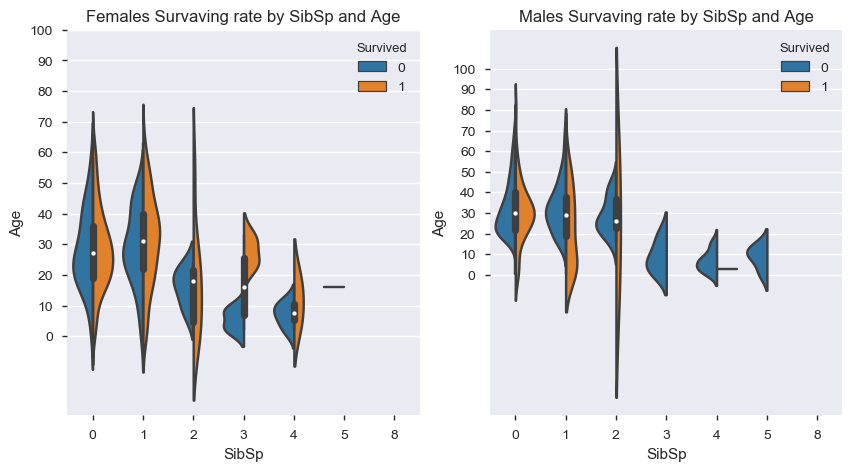

In [33]:
ViolinPlot(df_train,"SibSp")

In [34]:
df_sr_2 = df_train[["Sex","Cat_age","SibSp","Survived"]]
df_group_sr_2 = df_sr_2.groupby(["Sex","Cat_age","SibSp"],as_index = False).mean()
df_pivot_sr_2 = df_group_sr_2.pivot_table(df_sr_2,index=["Sex","Cat_age"],columns=["SibSp"])
df_pivot_sr_2

Survived                                   
SibSp                  0         1         2    3    4    5
Sex    Cat_age                                             
female Child    0.800000  0.750000  0.800000  0.0  0.2  NaN
       Teen     0.782609  0.777778  0.500000  NaN  1.0  0.0
       Adult    0.801802  0.739726  0.800000  1.0  NaN  NaN
male   Child    0.857143  1.000000  1.000000  0.0  0.1  0.0
       Teen     0.142857  0.000000  0.000000  NaN  0.0  0.0
       Adult    0.171233  0.242857  0.090909  0.0  NaN  NaN
       Senior   0.142857  0.000000       NaN  NaN  NaN  NaN

* Some insights:
* Children without siblings have more chances to live (~80% for females, 85% for males)
 
* Females:
    - Children had good chances to live even if they had one or two siblings (~75% and ~80%)
    - Adults had good chances to live even if they were single (~80%), married (74%) and with siblings (80%)
    - Teenagers with 0 or 1 SibSp had good chances ~73%
    - All teenagers with SibSp = 4 
    - All adults with SibSp = 5
* Males:
    - All children with one or two siblings survived.
    

## Correlation

In [35]:
df_train.corr()
df_train[["Pclass","Fare","Age","SibSp","Parch"]].corr()

,Pclass,Fare,Age,SibSp,Parch
Pclass,1.000000,-0.549500,-0.369226,0.083081,0.018443
Fare,-0.549500,1.000000,0.096067,0.159651,0.216225
Age,-0.369226,0.096067,1.000000,-0.308247,-0.189119
SibSp,0.083081,0.159651,-0.308247,1.000000,0.414838
Parch,0.018443,0.216225,-0.189119,0.414838,1.000000


- There is medium inversed correlation between Fare and Pclass variables.
- Age variable has a weak correlation with Pclass and SibSp
- There is a weak correlation between SibSp and Parch

# Data Manipulation

### Training dataset
* There is no missing values in target variable (Survived)
* We can drop PassangerID and Ticket attributes since they are not relevant for data analysis.
* "Age" variable has 19.9% missing values. Mininum age is 0.42 years (5 months) and maximun is 80 years.
* "Cabin" variable has 77.1% missing values. 
* Features like "Sex" and "Embarked" must be converted to numerical values.
    - "Sex" variable has no missing values
    - "Embarked" has 0.4% missing values

### Embarked variable

In [36]:
# Embarked missing values are going to be replaced by the most frequent value.
embarked_mode = df_train["Embarked"].value_counts().idxmax()
print("Embarked mode: ", embarked_mode)
df_train["Embarked"].replace(np.nan, embarked_mode, inplace=True)

Embarked mode:  S


### Title variable

In [37]:
def title(name):
    for string in name.split():
        if "." in string:
            return string[:-1]

missing_data = df_train.isnull() # True and False dataset
df_train["Title"] = df_train["Name"].apply(lambda x: title(x))
df_train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### Cat_age variable

In [38]:
# We are going to fill missing values from age and Cat_age variables using title variable

#First we want to change title for children by Boy and Girl instead of Master or Miss. Same for seniors
df_train.loc[(df_train.Title == "Master") & (df_train.Sex == "male") & (df_train.Cat_age == "Child"),"Title"] = "Boy"
df_train.loc[(df_train.Title == "Miss") & (df_train.Sex == "female") & (df_train.Cat_age == "Child"),"Title"] = "Girl"
df_train.loc[(df_train.Title == "Mr") & (df_train.Sex == "male") & (df_train.Cat_age == "Senior"),"Title"] = "Sr"
df_train.loc[(df_train.Title == "Mrs") & (df_train.Sex == "female") & (df_train.Cat_age == "Senior"),"Title"] = "Srs"

In [39]:
# We are going to get a dataset with most common cat_age for each title value
def top_Cat_age(g):
    return g['Cat_age'].value_counts().idxmax()

topdf = df_train.groupby('Title').apply(top_Cat_age).reset_index()
headers = ["Title","Cat_age"]
topdf.columns = headers

In [40]:
# Function which allows look for the missing values in Cat_age and 
# replace them by the most common Cat_age for his/her Title
def h(x,y):
    missing_data = x.isnull() # True and False dataset        
    if (missing_data["Cat_age"]):
        t = y[y.Title == x["Title"]]
        #t = y.apply(lambda y: y["Cat_age"] if (y["Title"] == x["Title"]) else False, axis =1) # did not work
        return t["Cat_age"].item()
    else:
        return x["Cat_age"]

df_train["Cat_age"] = df_train.apply(lambda x: h(x,topdf), axis = 1)   

### Age variable

In [41]:
# "Age" missing values are going to be replaced by the mean of its respective cat_age value
def mean_Cat_age(g):
    return g['Age'].mean()

meandf = df_train.groupby('Cat_age').apply(mean_Cat_age).reset_index()
headers = ["Cat_age","Mean_age"]
meandf.columns = headers

def h(x,y):
    missing_data = x.isnull() # True and False dataset        
    if missing_data["Age"]:
        t = y[y.Cat_age == x["Cat_age"]]
        return "{0:0.1f}".format(t["Mean_age"].item())
    else:
        return x["Age"]

df_train["Age"] = df_train.apply(lambda x: h(x,meandf), axis = 1)   

### Cabin Variable

In [42]:
# Cabin variable: 77.1 % missing values.
df_train["Cabin"] = df_train["Cabin"].apply(lambda x: str(x)[0]) # Taking first letter.

dftest = df_train[["Cabin","Pclass","Embarked"]]
table = dftest.pivot_table(index=["Cabin"],columns=["Pclass"],aggfunc="size")
table

Pclass,1,2,3
Cabin,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0
T,1.0,NaN,NaN
n,40.0,168.0,479.0


In [43]:
# The total of missing values is 687:
#  69.7% of missing values are for lower class
#  24.5% of missing values are for middle class
#   5.8% of missing values are for upper class
# As conclusion we can say that missing cabin values are from lower and middle classes (94.2%). 

# Lets see if it depends on the fare
dftest = df_train[["Cabin","Pclass","Cat_fare"]]
table = dftest.pivot_table(index=["Cabin"],columns=["Cat_fare"],aggfunc="size")
table

Cat_fare,LowPrice,MiddlePrice,HighPrice,Suite
Cabin,,,,
A,1.0,8.0,6.0,NaN
B,3.0,6.0,29.0,9.0
C,NaN,15.0,29.0,15.0
D,4.0,8.0,21.0,NaN
E,7.0,9.0,16.0,NaN
F,7.0,6.0,NaN,NaN
G,4.0,NaN,NaN,NaN
T,NaN,1.0,NaN,NaN
n,489.0,147.0,46.0,5.0


In [44]:
#87.0% of the missing values come from a fare lower than $20 (LowPrice)
# 8.7% of the missing values come from a middle fare ($20 < fare < $60)
# 95.7% of the total

# Therefore, missing Cabin values are most likely for LowPrices tickets of lower and middle classes
dftest = df_train[["Cabin","Pclass","Embarked","Cat_fare"]]
dftest = dftest[dftest["Pclass"].isin([2,3])]
dftest = dftest[dftest["Cat_fare"].isin(["LowPrice"])]
table = dftest.pivot_table(index=["Cabin"],columns=["Embarked"],aggfunc="size")
table


Embarked,C,Q,S
Cabin,,,
D,2.0,NaN,2.0
E,NaN,1.0,6.0
F,NaN,1.0,6.0
G,NaN,NaN,4.0
n,68.0,63.0,356.0


In [45]:
# We are going to keep n value for cabin, representing missing values for lowPrices fare
# Remaining values will be filled with Cabin according Fare (Upper class, HighPrice and Suite)

# "Age" missing values are going to be replaced by the mean of its respective cat_age value
def top_Cabin(g):
    return g['Cabin'].value_counts().idxmax()

#dflowprice = df[df["Cat_fare"].isin(["MiddlePrice","HighPrice","Suite"])]
dfprice = df_train[df_train["Cabin"].isin(["A","B","C","D","E","F","T"])]
topcabin = dfprice.groupby(["Cat_fare","Pclass"]).apply(top_Cabin).reset_index()
headers = ["Cat_fare","Pclass","Cabin"]
topcabin.columns = headers
topcabin

,Cat_fare,Pclass,Cabin
0,LowPrice,1,B
1,LowPrice,2,D
2,LowPrice,3,F
3,MiddlePrice,1,C
4,MiddlePrice,2,F
5,MiddlePrice,3,F
6,HighPrice,1,C
7,Suite,1,C


In [46]:
def Replace_Cabin(x,y):
    if x.Pclass == 1 and x.Cabin == "n":
        t = y.loc[(y.Cat_fare == x["Cat_fare"]) & (y.Pclass == 1)]
        #t = y[y.Cat_fare == x["Cat_fare"]]
        return t["Cabin"].item()
    else:
        return x["Cabin"]
df_train["Cabin"] = df_train.apply(lambda x: Replace_Cabin(x,topcabin), axis = 1)   

### Droping unecessary variables

In [47]:
df_train = df_train.drop(["PassengerId", "Ticket"], axis=1)

In [48]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cat_age,Cat_fare,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,n,S,Adult,LowPrice,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,C,Adult,HighPrice,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,n,S,Adult,LowPrice,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C,S,Adult,HighPrice,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,n,S,Adult,LowPrice,Mr


<Figure size 800x550 with 0 Axes>

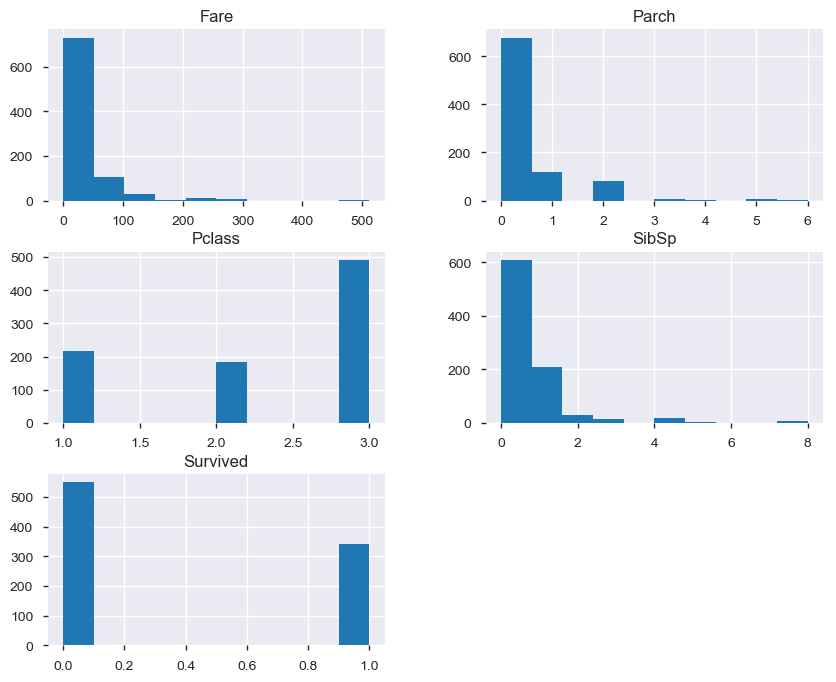

<Figure size 800x550 with 0 Axes>

In [49]:
df_train.hist(figsize=(10,8))
plt.figure()

# Data Modeling

In [50]:
### Podriamos quitar los otros titulos y dejar uno solo como "Others"

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


### Getting dummy variables

In [52]:
D_sex = pd.get_dummies(df_train["Sex"])
D_cabin = pd.get_dummies(df_train["Cabin"])
D_emb = pd.get_dummies(df_train["Embarked"])
D_catage = pd.get_dummies(df_train["Cat_age"])
D_catfare = pd.get_dummies(df_train["Cat_fare"])
D_title = pd.get_dummies(df_train["Title"])

In [53]:
df_TRAIN_t = df_train
df_TRAIN_t = pd.concat([df_train, D_sex], axis=1)
df_TRAIN_t = pd.concat([df_train, D_cabin], axis=1)
df_TRAIN_t = pd.concat([df_train, D_emb], axis=1)
df_TRAIN_t = pd.concat([df_train, D_catage], axis=1)
df_TRAIN_t = pd.concat([df_train, D_catfare], axis=1)
df_TRAIN_t = pd.concat([df_train, D_title], axis=1)

In [54]:
df_TRAIN_t = df_TRAIN_t.drop(["Name","Sex", "Cabin","Embarked","Cat_age","Cat_fare","Title"], axis=1)

In [55]:
x_data = df_TRAIN_t.drop(['Survived'], axis = 1)
y_data = df_TRAIN_t["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 268
number of training samples: 623


### First Model: K-Neighbors Classifier

Building the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

In [56]:
# K-Neighbors Classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
#print("Test set predictions: {}".format(clf.predict(x_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [57]:
score_training = clf.score(x_train,y_train)
score_testing = clf.score(x_test,y_test)

In [58]:
print("R^2 on the training data = ", score_training)
print("R^2 on the test data = ", score_testing)

R^2 on the training data =  0.85553772070626
R^2 on the test data =  0.7164179104477612


Since R2 training data is close to one while R2 testing doesn't show a really good performace, most likely we are getting an overfitted model. Let's check for different k neightbors

R^2 on the training data =  0.85553772070626
R^2 on the test data =  0.7164179104477612


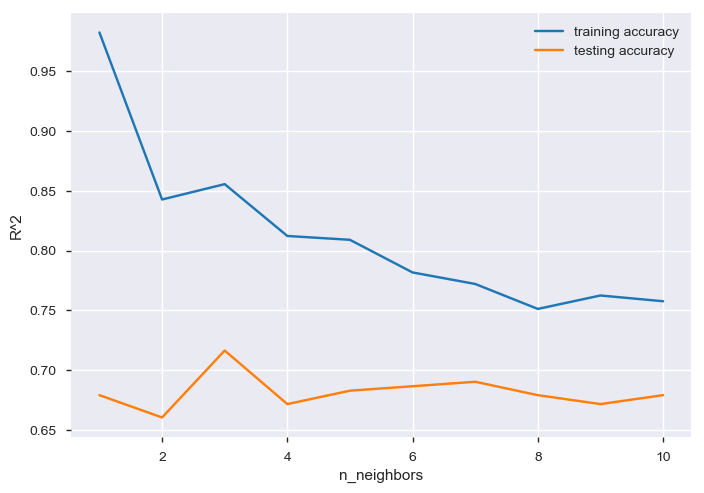

In [59]:
Rsqu_train = []
Rsqu_test = []


n_neighbors = range(1,11)
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    Rsqu_train.append(clf.score(x_train, y_train))
    Rsqu_test.append(clf.score(x_test, y_test))
    if(n==3):
        print("R^2 on the training data = ", clf.score(x_train, y_train))
        print("R^2 on the test data = ", clf.score(x_test, y_test))

plt.plot(n_neighbors,Rsqu_train,label='training accuracy')
plt.plot(n_neighbors,Rsqu_test,label='testing accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('R^2')
plt.legend()
plt.show()

Model does not perform that well. Best case scenario is n_neightbors = 3, where R^2 is 0.85 for training data, and 
0.71 for testing data. Which means this model does perform well.